<a href="https://colab.research.google.com/github/joshbrx/biomath_model/blob/main/Voronoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polígonos de Voronoi

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random 
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.collections import LineCollection

from matplotlib.patches import Polygon

mpl.rcParams['figure.figsize'] = (12,6)

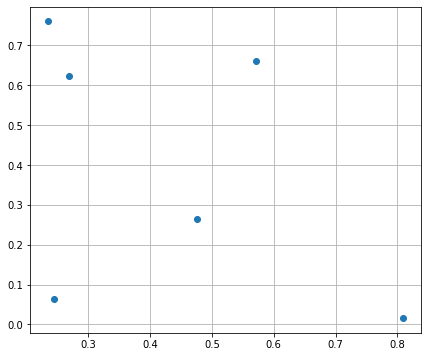

In [2]:
puntos = np.random.rand(6,2)        
plt.figure(figsize=(7,6))
plt.scatter(puntos[:,0], puntos[:,1])
plt.grid();

In [3]:
### Create Voronoi object
vor = Voronoi(puntos)

In [4]:
### Get Voronoi vertices
vor_vertices = vor.vertices
print(vor_vertices.shape)
# vor_vertices

(6, 2)


In [5]:
### Get Voronoi regions
vor_regions = vor.regions
print(vor_regions)

[[-1, 0, 1], [], [5, 3, 2, 4], [3, 0, -1, 2], [4, -1, 2], [5, 1, 0, 3], [5, 1, -1, 4]]


<Figure size 504x504 with 0 Axes>

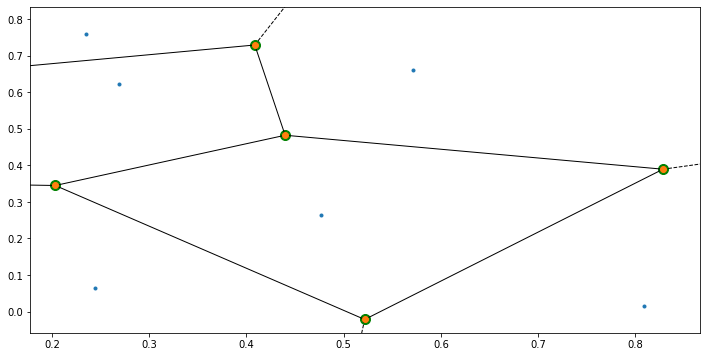

In [6]:
### Use built-in function to plot 
plt.figure(figsize=(7,7))
voronoi_plot_2d(vor)
plt.scatter(vor_vertices[:,0], vor_vertices[:,1], color="green", s=100)
plt.show()

In [7]:
### Get Voronoi ridge-vertices and ridge-points
print(vor.ridge_vertices)
print(vor.ridge_points)
print(vor.regions)

[[-1, 0], [0, 1], [-1, 1], [2, 3], [2, 4], [3, 5], [4, 5], [-1, 2], [0, 3], [-1, 4], [1, 5]]
[[2 5]
 [2 0]
 [2 3]
 [4 5]
 [4 1]
 [4 0]
 [4 3]
 [5 1]
 [5 0]
 [1 3]
 [0 3]]
[[-1, 0, 1], [], [5, 3, 2, 4], [3, 0, -1, 2], [4, -1, 2], [5, 1, 0, 3], [5, 1, -1, 4]]


In [8]:
print("Point region:,", vor.point_region)
for i in vor.point_region:
    print(vor.regions[i])

Point region:, [5 4 0 6 2 3]
[5, 1, 0, 3]
[4, -1, 2]
[-1, 0, 1]
[5, 1, -1, 4]
[5, 3, 2, 4]
[3, 0, -1, 2]


Ahora continuamos al definir las fronteras de nuestra superficie. Como queremos que se asemeje a una estructura acinar, simulamos un medio círculo interior y exterior.

\begin{align}
    \alpha(r, \theta) = r,\qquad\ \theta\in{\{0, \pi\}},\quad  r=\{1, 2\}
\end{align}

\begin{align}
    x &= r\cos\theta,\quad &y &= r\sin\theta\\
    \Rightarrow r &= \sqrt{x^2+y^2},\quad &\theta &= \arctan\left(\frac{y}{x}\right)
\end{align}

In [9]:
### parámetros
tol = 0.001; n_space = 50
theta = np.linspace(tol, np.pi-tol, n_space);
r = np.array([1.0 + tol, 2.0 - tol]);

### funciones
alpha_x = lambda r, theta: r*np.cos(theta);
alpha_y = lambda r, theta: r*np.sin(theta);

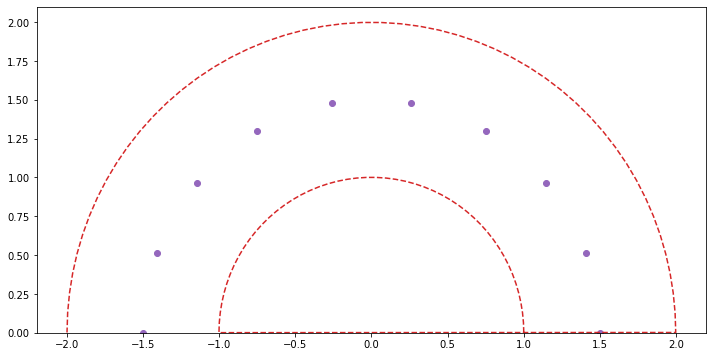

In [10]:
N = 10;
X_border, Y_border = [], []
for i in range(len(r)):
    X_border.append(alpha_x(r[i], theta))
    Y_border.append(alpha_y(r[i], theta))

X_border = np.array(X_border).flatten()
Y_border = np.array(Y_border).flatten()
pts_border = np.array([X_border, Y_border]).T

#----------------------------------------
# r_rand     = np.random.rand(N) * abs(r[-1]-r[0]) + r[0]
# theta_rand = np.random.rand(N) * abs(theta[-1]-theta[0]) + theta[0]
r_rand = np.ones(N) * 1.5;
theta_rand = np.linspace(tol, np.pi-tol, N);

X_rand = alpha_x(r_rand, theta_rand)
Y_rand = alpha_y(r_rand, theta_rand)
pts_rand = np.array([X_rand, Y_rand]).T

#----------------------------------------
X_base = np.linspace(-r[1], r[1], n_space).flatten()
Y_base = np.zeros(n_space).flatten()-0.1
pts_base = np.array([X_base, Y_base]).T

#----------------------------------------

plt.scatter(X_rand, Y_rand, color="tab:purple")
plt.plot(X_border, Y_border, "--", color="tab:red");
plt.plot(X_base, Y_base, "--", color="tab:red"); 
plt.ylim([0.0,2.1]); plt.show()

In [11]:
def regions_sort(vor):
    for region in vor.regions:
        region.sort(reverse=False)
    vor.regions.sort(reverse=False)
    return vor.regions

def vertices_sort(vor):
    temp_list = vor.vertices.tolist()
    temp_list.sort()
    # temp_list.sort(key=lambda x: x[1])
    return np.asarray(temp_list)

# regions_sort(vor)
# vertices_sort(vor)

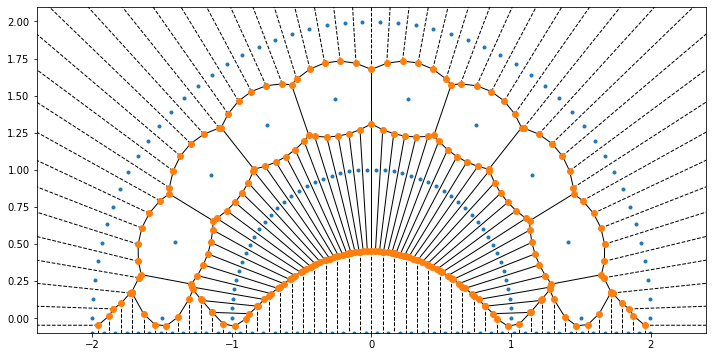

<Figure size 1080x504 with 0 Axes>

In [12]:
total = np.concatenate((pts_rand, pts_border, pts_base))
vor = Voronoi(total)
# vor_vertices = vor.vertices
vor_vertices = vertices_sort(vor)
vor_regions = regions_sort(vor)

voronoi_plot_2d(vor)
plt.ylim([-0.1,2.1])
plt.figure(figsize=(15,7))
plt.show()

(-0.1, 2.0)

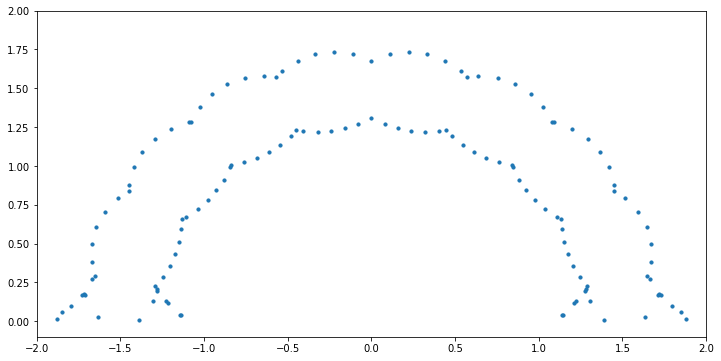

In [13]:
vor_vertices = vor_vertices[np.where(vor_vertices[:,1] >= 0)]
vor_vertices = vor_vertices[np.where(np.sqrt(vor_vertices[:,1]**2+vor_vertices[:,0]**2) >=r[0])]
vor_vertices = vor_vertices[np.where(np.sqrt(vor_vertices[:,1]**2+vor_vertices[:,0]**2) <=r[1])]

plt.scatter(vor_vertices[:,0], vor_vertices[:,1], s=10)
plt.xlim([-2,2]); plt.ylim([-0.1,2])

*   ###  __Paso $N+1$:__ _Encontrando y discriminando las regiones de Voronoi_



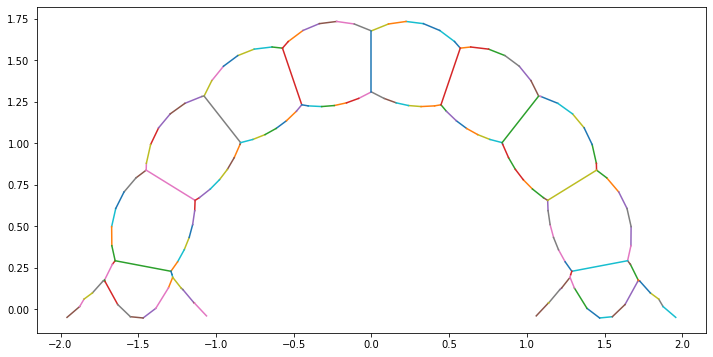

In [14]:
finite_segments = []
for pointidx, simplex in zip(vor.ridge_points, vor.ridge_vertices):
    simplex = np.asarray(simplex)
    if np.all(simplex >= 0):
        finite_segments.append(vor.vertices[simplex])

for i in range(len(finite_segments)):
    x_line = finite_segments[i][:,0]
    y_line = finite_segments[i][:,1]
    r_line = (x_line**2 + y_line**2)**(1/2)
    if (np.min(r_line)>= r[0]-tol) and (np.max(r_line)<= r[1]+tol) and (np.min(y_line) >= -0.15):
        plt.plot(x_line, y_line)

In [15]:
def get_polygons(vor):
    Polygons = []
    # vor_vertices = vertices_sort(vor)
    # vor_regions = regions_sort(vor)
    for i in range(len(vor.regions)):
        if (not -1 in vor.regions[i]) and (len(vor.regions[i]) >=1):
            x_ = np.array([vor.vertices[k][0] for k in vor.regions[i]])
            y_ = np.array([vor.vertices[k][1] for k in vor.regions[i]])
            r_ = (x_**2+y_**2)**(1/2)
            if (np.min(r_) >= r[0] - tol) and (np.max(r_) <= r[1] + tol):
                polygon = np.array([vor.vertices[k] for k in vor.regions[i]])
                Polygons.append([*zip(*polygon)])
    Polygons.sort(reverse=True)
    for i in range(len(Polygons)):
          Polygons[i] = np.array(Polygons[i])
    return Polygons

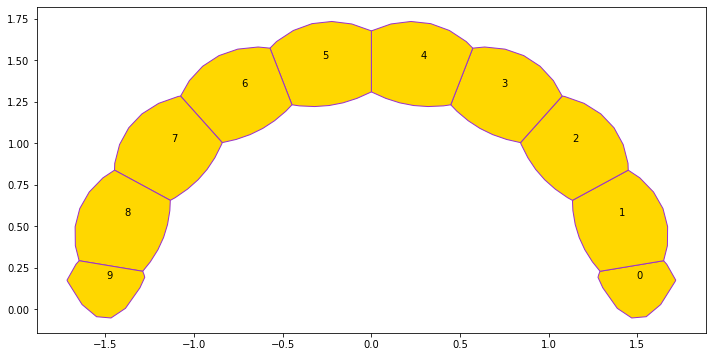

In [16]:
### make up data points
points = np.random.rand(15,2)

### compute Voronoi tesselation
vor = Voronoi(total)

### get Voronoi regions
Polygons = get_polygons(vor)

### visualize Voronoi regions
for i in range(len(Polygons)):
    polygon = Polygons[i]
    X, Y = polygon
    plt.text(np.mean(X), np.mean(Y) + 0.05, f"{i}")
    plt.fill(X, Y, edgecolor="darkorchid", facecolor="gold")
plt.show()

In [17]:
len(Polygons)           # Número de polígonos guardados (coincide con el número de puntos dados)
# x[i] -> Polygons[i][0]
# y[i] -> Polygons[i][1]

10


*   ###  __Paso $N+2$:__ _Calculando el área y el centroide de un polígono_

\begin{align}
    A &= \frac{1}{2}\sum_{i=0}^{N-1} (x_iy_{i+1}-x_{i+1}y_i)
\end{align}

Y para el cálculo de las coordenadas del centro de masas en 2D tenemos las siguientes ecuaciones

\begin{align}
    C_x &= \frac{1}{6A}\sum_{i=0}^{N-1}(x_i+x_{i+1})(x_iy_{i+1}-x_{i+1}y_i) \\
    C_y &= \frac{1}{6A}\sum_{i=0}^{N-1}(y_i+y_{i+1})(x_iy_{i+1}-x_{i+1}y_i)
\end{align}

Para mayor información puede consultar el siguiente enlace: [Calculating the area and centroid of a polygon. By Paul Bourke](https://lexrent.eu/wp-content/uploads/torza/artikel_groep_sub_2_docs/BYZ_3_Polygon-Area-and-Centroid.pdf)

-----

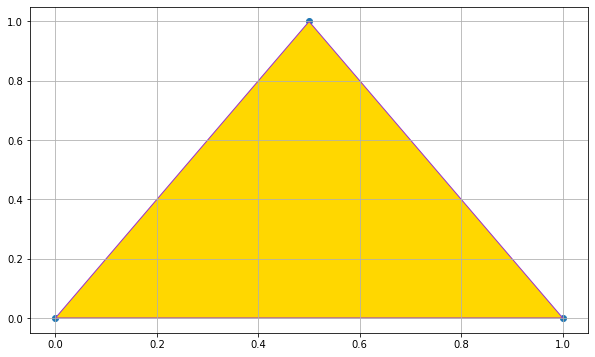

In [18]:
x_prueba = np.array([0,1,0.5])
y_prueba = np.array([0,0,1])

polygon_prueba = np.array([x_prueba, y_prueba])

plt.figure(figsize=(10,6))
plt.scatter(x_prueba, y_prueba); plt.fill(x_prueba, y_prueba, edgecolor="darkorchid", facecolor="gold")
plt.grid()

In [19]:
def get_area(polygon):
    n_area = polygon.shape[1]
    X, Y = polygon
    S = np.empty(n_area)
    
    for i in range(n_area):
        S[i] = X [i]*Y[(i+1) % n_area] - X[(i+1) % n_area]*Y[i]
    return abs((1/2)*np.sum(S))

get_area(polygon_prueba)

0.5

In [20]:
def area_voronoi(Polygons):
    S = np.empty(len(Polygons))

    for i in range(len(S)):
        S[i] = get_area(Polygons[i])
    return S

area_voronoi(Polygons)

array([0.10033571, 0.23768503, 0.23778589, 0.23770568, 0.23774705,
       0.23774705, 0.23770568, 0.23778589, 0.23768503, 0.10033571])

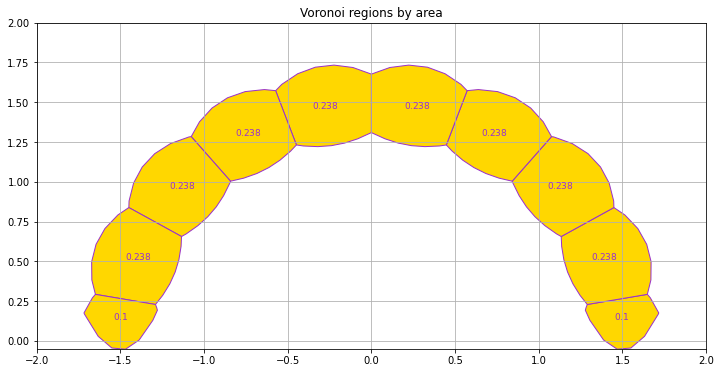

In [21]:
A_vor = area_voronoi(Polygons)

for i in range(len(Polygons)):
    X, Y = Polygons[i]
    num_label = round(A_vor[i], 3)
    plt.text(np.mean(X), np.mean(Y), f'${num_label}$', fontsize=9, horizontalalignment='center', color='darkorchid', fontweight='bold')
    plt.fill(X, Y, edgecolor="darkorchid", facecolor="gold")

plt.title("Voronoi regions by area")
plt.xlim([-2.0, 2.0]); plt.ylim([-0.05, 2.0])
plt.grid()

---

Ahora se calcula el centroide de cada polígono

In [22]:
def get_centroid(polygon, tol = 0.05):
    n_centroid = polygon.shape[1]
    X, Y = polygon
    CX, CY = np.empty([2, n_centroid])
    A = get_area(polygon)
    
    for i in range(n_centroid):
        CX[i] = (X[i] + X[(i+1) % n_centroid]) * (X[i] * Y[(i+1) % n_centroid] - X[(i+1) % n_centroid]*Y[i])
        CY[i] = (Y[i] + Y[(i+1) % n_centroid]) * (X[i] * Y[(i+1) % n_centroid] - X[(i+1) % n_centroid]*Y[i])
     
    cX, cY = (np.sum(CX), np.sum(CY))/(6*A) 
    if abs(cX - np.mean(X)) > abs(-cX - np.mean(X)):
        cX = -cX
    if abs(cY - np.mean(Y)) > abs(-cY - np.mean(Y)):
        cY = -cY
    return cX, cY

get_centroid(polygon_prueba)

(0.5, 0.3333333333333333)

In [23]:
def centroid_voronoi(Polygons):
    C = np.empty([2, len(Polygons)])
    for i in range(C.shape[1]):
        C[:,i] = get_centroid(Polygons[i])
    return C

centroid_voronoi(Polygons)

array([[ 1.50392415,  1.41121442,  1.15023982,  0.75066099,  0.26070098,
        -0.26070098, -0.75066099, -1.15023982, -1.41121442, -1.50392415],
       [ 0.13171065,  0.51489083,  0.96625932,  1.30121502,  1.47943097,
         1.47943097,  1.30121502,  0.96625932,  0.51489083,  0.13171065]])

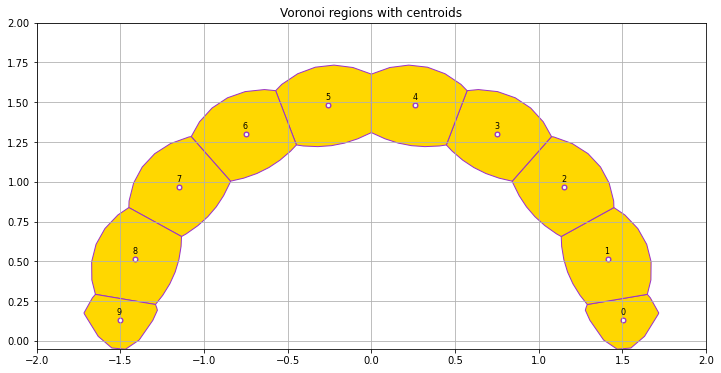

In [24]:
C_vor = centroid_voronoi(Polygons);

fig, ax = plt.subplots();

for i in range(len(Polygons)):
    X, Y = Polygons[i]
    num_label = round(get_area(Polygons[i]), 3)
    plt.text(C_vor[0,i], C_vor[1,i]+0.035, f'${i}$', fontsize=8, horizontalalignment='center', color='black', fontweight='bold')
    ax.fill(X, Y, zorder=-2, edgecolor="darkorchid", facecolor="gold")
ax.scatter(C_vor[0], C_vor[1], color="darkorchid", zorder=1, s=25)
ax.scatter(C_vor[0], C_vor[1], color="azure", zorder=2, s=5)

plt.title("Voronoi regions with centroids")
plt.xlim([-2.0, 2.0]); plt.ylim([-0.05, 2.0])
plt.grid()

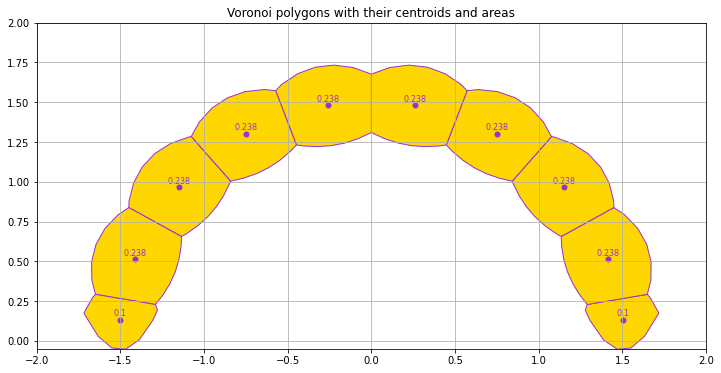

In [25]:
A_vor = area_voronoi(Polygons);
C_vor = centroid_voronoi(Polygons);

for i in range(len(Polygons)):
    X, Y = Polygons[i]
    num_label = round(A_vor[i], 3)
    plt.text(C_vor[0,i], C_vor[1,i]+0.025, f'${num_label}$', fontsize=8, horizontalalignment='center', color='darkorchid', fontweight='bold', zorder=1)
    plt.fill(X, Y, zorder=-2, edgecolor="darkorchid", facecolor="gold")

plt.scatter(C_vor[0], C_vor[1], color="darkorchid", zorder=-1, s=25); ax.scatter(C_vor[0], C_vor[1], color="azure", zorder=0, s=5)
plt.title("Voronoi polygons with their centroids and areas")
plt.xlim([-2.0, 2.0]); plt.ylim([-0.05, 2.0])
plt.grid()

*   ###  __Paso $N+3$:__ _Definiendo las interacciones y evolución del sistema a partir del potencial $V(\vec{x},t)$_

\begin{align}
    V(\vec{r_i}, t) = \frac{K_v}{2}\left(A_i(t)-A_0(t)\right)^2 + \frac{K_c}{2}\big|\vec{r}_i(t) - \vec{r}_{0,i}(t)\big|^2 
\end{align}

donde $A_0 = \sum_{i=1}^N(A_i/N)$

[Cell Patterns Emerge from Coupled Chemical and Physical Fields with Cell Proliferation Dynamics: The Arabidopsis thaliana Root as a Study System](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3642054/)

\begin{align}
    A_{1/2,dona} &= \frac{\pi}{2} \left(r_{max}^2-r_{min}^2\right)\\
    \Rightarrow A_0 &= \lim_{t\to\infty} A_i(t)=\frac{A_{1/2,dona}}{N_{reg}} = \frac{\pi}{2N} \left(r_{max}^2-r_{min}^2\right)
\end{align}

In [26]:
A_dona = (np.pi/2)*(r[1]**2 - r[0]**2)
A_0 = A_dona/len(Polygons)
A_0

0.47029642024239215

In [27]:
K_v, K_c = 1, 1

# (K_v/2)*(A_vor-A_0)**2                # evolución estática
(K_v/2)*(A_vor-np.mean(A_vor))**2    # evolución dinámica

array([0.00604078, 0.00037629, 0.00037906, 0.00037686, 0.00037799,
       0.00037799, 0.00037686, 0.00037906, 0.00037629, 0.00604078])

In [28]:
def dist_vor(pts_vor, C_vor):
    dist, index = [], []
    for i in range(len(pts_vor)):
        s = pts_rand[i].reshape([2,1])
        dist.append(np.min(np.sum((C_vor - s)**2, axis=0)))
        index.append(np.argmin(np.sum((C_vor - s)**2, axis=0)))

    return np.array(dist), np.array(index), 

dist_vor(pts_rand, C_vor)[1]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

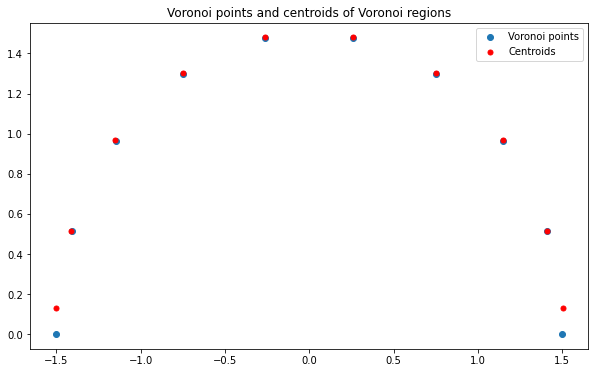

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(pts_rand.T[0],pts_rand.T[1], label="Voronoi points")
plt.scatter(C_vor[0], C_vor[1], color="red", s=25, label="Centroids")
plt.title("Voronoi points and centroids of Voronoi regions"); plt.legend()

In [30]:
K, A_0 = [1, 1], (np.pi/2)*(r[1]**2 - r[0]**2)/len(Polygons)

def potential_vor(K, pts_vor, A_vor, C_vor):
    V = np.empty(len(pts_vor))
    dist, index = dist_vor(pts_vor, C_vor)

    # v1 = ((K[0]/2)*(A_vor-A_0)**2)[index]               # evolución estática
    v1 = ((K[0]/2)*(A_vor-np.mean(A_vor))**2)[index]
    v2 = (K[1]/2)*dist
    return v1 + v2

potential_vor(K, pts_rand, A_vor, C_vor)

array([0.01452589, 0.00037873, 0.00038156, 0.00037931, 0.00038047,
       0.00038047, 0.00037931, 0.00038156, 0.00037873, 0.01452589])

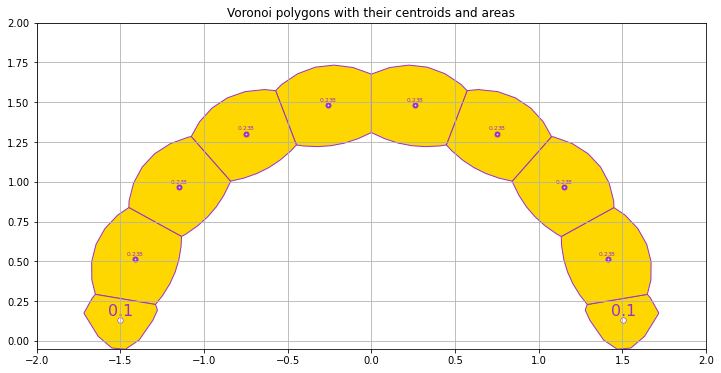

In [31]:
V_vor = potential_vor(K, pts_rand, A_vor, C_vor)

for i in range(len(Polygons)):
    X, Y = Polygons[i]
    num_label = round(A_vor[i], 3)
    plt.text(C_vor[0,i], C_vor[1,i]+0.025, f'${num_label}$', fontsize=np.sqrt(V_vor[i])*100+4, horizontalalignment='center', color='darkorchid', fontweight='bold', zorder=1)
    plt.fill(X, Y, zorder=-2, edgecolor="darkorchid", facecolor="gold")
    plt.scatter(C_vor[0,i], C_vor[1,i], color="azure", zorder=0, s=V_vor[i]*1000)

plt.scatter(C_vor[0], C_vor[1], color="darkorchid", zorder=-1, s=25); 
plt.title("Voronoi polygons with their centroids and areas")
plt.xlim([-2.0, 2.0]); plt.ylim([-0.05, 2.0])
plt.grid()

\begin{align}
    F_x(x_i, t) = &-\frac{K_v}{2}\left[\frac{1}{2}\sum_{m=1}^{M} \frac{(x_i-x_m)\cdot l_{i,m}}{|\vec{r}_i-\vec{r}_m|}\{A_i - A_0\}\right]\\
                  &- K_c(x_i-x_{0,i})\\
    F_y(y_i, t) = &-\frac{K_v}{2}\left[\frac{1}{2}\sum_{m=1}^{M} \frac{(y_i-y_m)\cdot l_{i,m}}{|\vec{r}_i-\vec{r}_m|}\{A_i - A_0\}\right]\\
                  &- K_c(y_i-y_{0,i})  
\end{align}

In [32]:
def get_lines(vor):
    line_segments, line_regions = [], []
    for simplex, pointidx in zip(vor.ridge_vertices, vor.ridge_points):
        if -1 not in simplex:
            pointidx = np.asarray(pointidx)
            simplex = np.asarray(simplex)
            if np.all(pointidx <= len(pts_rand)-1):
                line_segments.append(vor.vertices[simplex])
                line_regions.append(pointidx)
    # line_segments.sort()
    line_segments = np.array(line_segments)
    line_regions = np.array(line_regions)
    return line_segments, line_regions

get_lines(vor)[0], get_lines(vor)[1]

(array([[[-1.44877988e+00,  8.37741753e-01],
         [-1.13414650e+00,  6.55808306e-01]],
 
        [[-8.41224570e-01,  1.00343777e+00],
         [-1.07621331e+00,  1.28373935e+00]],
 
        [[ 1.07621331e+00,  1.28373935e+00],
         [ 8.41224570e-01,  1.00343777e+00]],
 
        [[ 5.71927731e-01,  1.57244568e+00],
         [ 4.47856118e-01,  1.23132588e+00]],
 
        [[ 1.66533454e-16,  1.67648169e+00],
         [ 1.11022302e-16,  1.30884949e+00]],
 
        [[-1.64850779e+00,  2.92187538e-01],
         [-1.28972322e+00,  2.28595252e-01]],
 
        [[-5.71927731e-01,  1.57244568e+00],
         [-4.47856118e-01,  1.23132588e+00]],
 
        [[ 1.44877988e+00,  8.37741753e-01],
         [ 1.13414650e+00,  6.55808306e-01]],
 
        [[ 1.64850779e+00,  2.92187538e-01],
         [ 1.28972322e+00,  2.28595252e-01]]]), array([[7, 8],
        [7, 6],
        [3, 2],
        [3, 4],
        [4, 5],
        [8, 9],
        [6, 5],
        [1, 2],
        [1, 0]], dtype=int32))

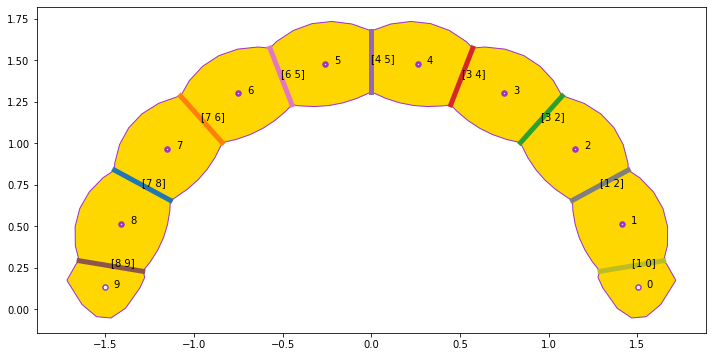

In [33]:
Line_segments, Line_regions = get_lines(vor)

### Plot shared lines 
for i in range(len(Line_segments)):
    line_segment = Line_segments[i]
    x_line = line_segment[:,0]
    y_line = line_segment[:,1]
    plt.plot(x_line, y_line, linewidth=5)
    plt.text(np.mean(x_line), np.mean(y_line), f"{Line_regions[i]}", color="black", zorder=2)

### Visualize Voronoi regions
for i in range(len(Polygons)):
    X, Y = Polygons[i]
    plt.fill(X, Y, zorder=-2, edgecolor="darkorchid", facecolor="gold")
    plt.text(C_vor[0,i]+0.05, C_vor[1,i], f"{i}", color="black", zorder=0)
    plt.scatter(C_vor[0,i], C_vor[1,i], color="azure", zorder=0, s=V_vor[i]*500)
plt.scatter(C_vor[0], C_vor[1], color="darkorchid", zorder=-1, s=30); 

{'7,8': 0.13209394062362145, '6,7': 0.13378868237324726, '2,3': 0.13378868237324706, '3,4': 0.13175648193463965, '4,5': 0.13515343205633382, '8,9': 0.13277034674859395, '5,6': 0.13175648193463937, '1,2': 0.1320939406236214, '0,1': 0.13277034674859375}


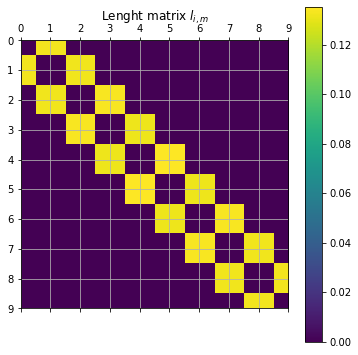

In [34]:
s = (len(Polygons), len(Polygons))
empty_matrix = np.zeros(s)
dist_dict = {}
for k in range(len(Line_regions)):
    i, m = sorted(Line_regions[k])
    # print(i, m)
    d = np.sum((Line_segments[k][0]-Line_segments[k][1])**2)
    empty_matrix[i,m] += d
    empty_matrix[m,i] += d
    dist_dict[f"{i},{m}"] = d
    # dist_dict[(m,i)] += d

plt.matshow(empty_matrix);
plt.xlim([0,len(Polygons)-1]); plt.ylim([len(Polygons)-1,0]);
plt.title("Lenght matrix $l_{i,m}$"); plt.colorbar(); plt.grid()
print(dist_dict)